### Exploring Distorting by clipping using the `Audio` Object

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as sf


In [2]:
from ipywidgets import interactive
from IPython.display import Audio, display
import numpy as np

In [3]:
max_time = 3 #duration in seconds
rate = 8000 #sample rate
times = np.linspace(0,max_time,rate*max_time)


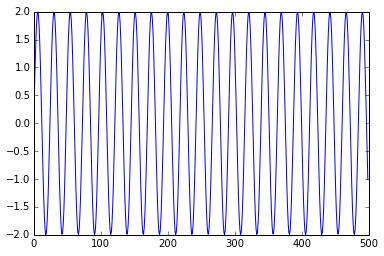

In [4]:
f1=330.0
amp=2.0
signal = amp*np.sin(2*np.pi*f1*times)
plt.plot(signal[0:500])
plt.show()

In [5]:

display(signal)

array([  0.00000000e+00,   5.12599624e-01,   9.90954860e-01, ...,
        -9.90954860e-01,  -5.12599624e-01,  -1.76393706e-12])

In [6]:
display(Audio(data=signal, rate=rate))
    

In [7]:
clippedsig = np.clip(signal,-0.2,0.2)

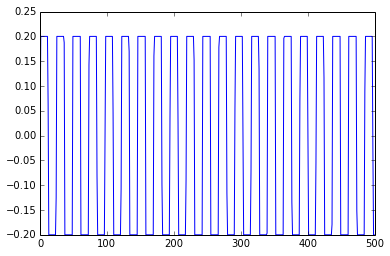

In [8]:
plt.plot(clippedsig[0:500])
plt.show()

In [9]:
display(Audio(data=clippedsig, rate=rate))

## Discrete Fourier Transform (DFT) 

Now we want to take the Fourier transform of our x array.

Lets remind ourselves of the definition of the Discrete Fourier Transform:

$$X(k) = \sum_{j=0}^{N-1} x(j) e^{-i 2 \pi j \frac{k}{N} }$$

where:

* $x(j)$ is the $j$th sample for the time-domain function (the DFT input).
* $N$ is the total number of samples.
* $X(k)$ is the output of the DFT for values of $k$ ranging from $-(N/2-1)$ to $N/2$.
* The integer values k correspond to frequencies $k/N$.

Lets perform the DFT manually, from this equation:

In [ ]:
def DFT(x_array,rate):
    j_array=np.arange(0,rate)
    N=rate
    print x_array,j_array,N
    k_array = np.arange(-(N/2.0-1.0),N/2.0,1.0)
    X = np.zeros(len(k_array), dtype=np.complex)
    print k_array 
    # iterate over the fourier-space variable k
    for k_indx,k in enumerate(k_array):
        #iterate over the original-space variable j
        for j_indx,j in enumerate(j_array):
            arg = x_array[j_indx]*np.exp(-1.j*2.0*np.pi*k*j/N) # This is the transform
            X[k_indx] = X[k_indx] + arg
    plt.figure(figsize=(15,10))
    plt.plot(k_array/N,X)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()
    return X

In [ ]:
X=DFT(signal[0:rate],rate)

[ 0.          0.51259962  0.99095486 ..., -1.27489236 -0.83735217
 -0.34387239] [   0    1    2 ..., 7997 7998 7999] 8000
[-3999. -3998. -3997. ...,  3997.  3998.  3999.]
